In [ ]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
#reading the dataset
df=pd.read_csv('Carbon Emission.csv')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [ ]:
#seeing dataframe features to proceed further
print(df.shape)
print(df.columns.tolist())
df.info()

(10000, 20)
['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  

In [ ]:
#as the dataset is very huge and we need only some features so copying the necessary features to a new dataframe named df_clean to make it easy for me and now will work on df_clean
columns_to_keep = ['Diet', 'Transport', 'Energy efficiency', 'CarbonEmission']
df_clean = df[columns_to_keep].copy()


In [64]:
#seeing the new dataframe df_clean and checking if there is any null value present
print(df_clean.head())
print(df_clean.shape)
print(df_clean.isnull().sum())
print(df_clean.columns.tolist())
df_clean.info()

          Diet     Transport Energy efficiency  CarbonEmission
0  pescatarian        public                No            2238
1   vegetarian  walk/bicycle                No            1892
2     omnivore       private         Sometimes            2595
3     omnivore  walk/bicycle         Sometimes            1074
4   vegetarian       private               Yes            4743
(10000, 4)
Diet                 0
Transport            0
Energy efficiency    0
CarbonEmission       0
dtype: int64
['Diet', 'Transport', 'Energy efficiency', 'CarbonEmission']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Diet               10000 non-null  object
 1   Transport          10000 non-null  object
 2   Energy efficiency  10000 non-null  object
 3   CarbonEmission     10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_4292\423411055.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


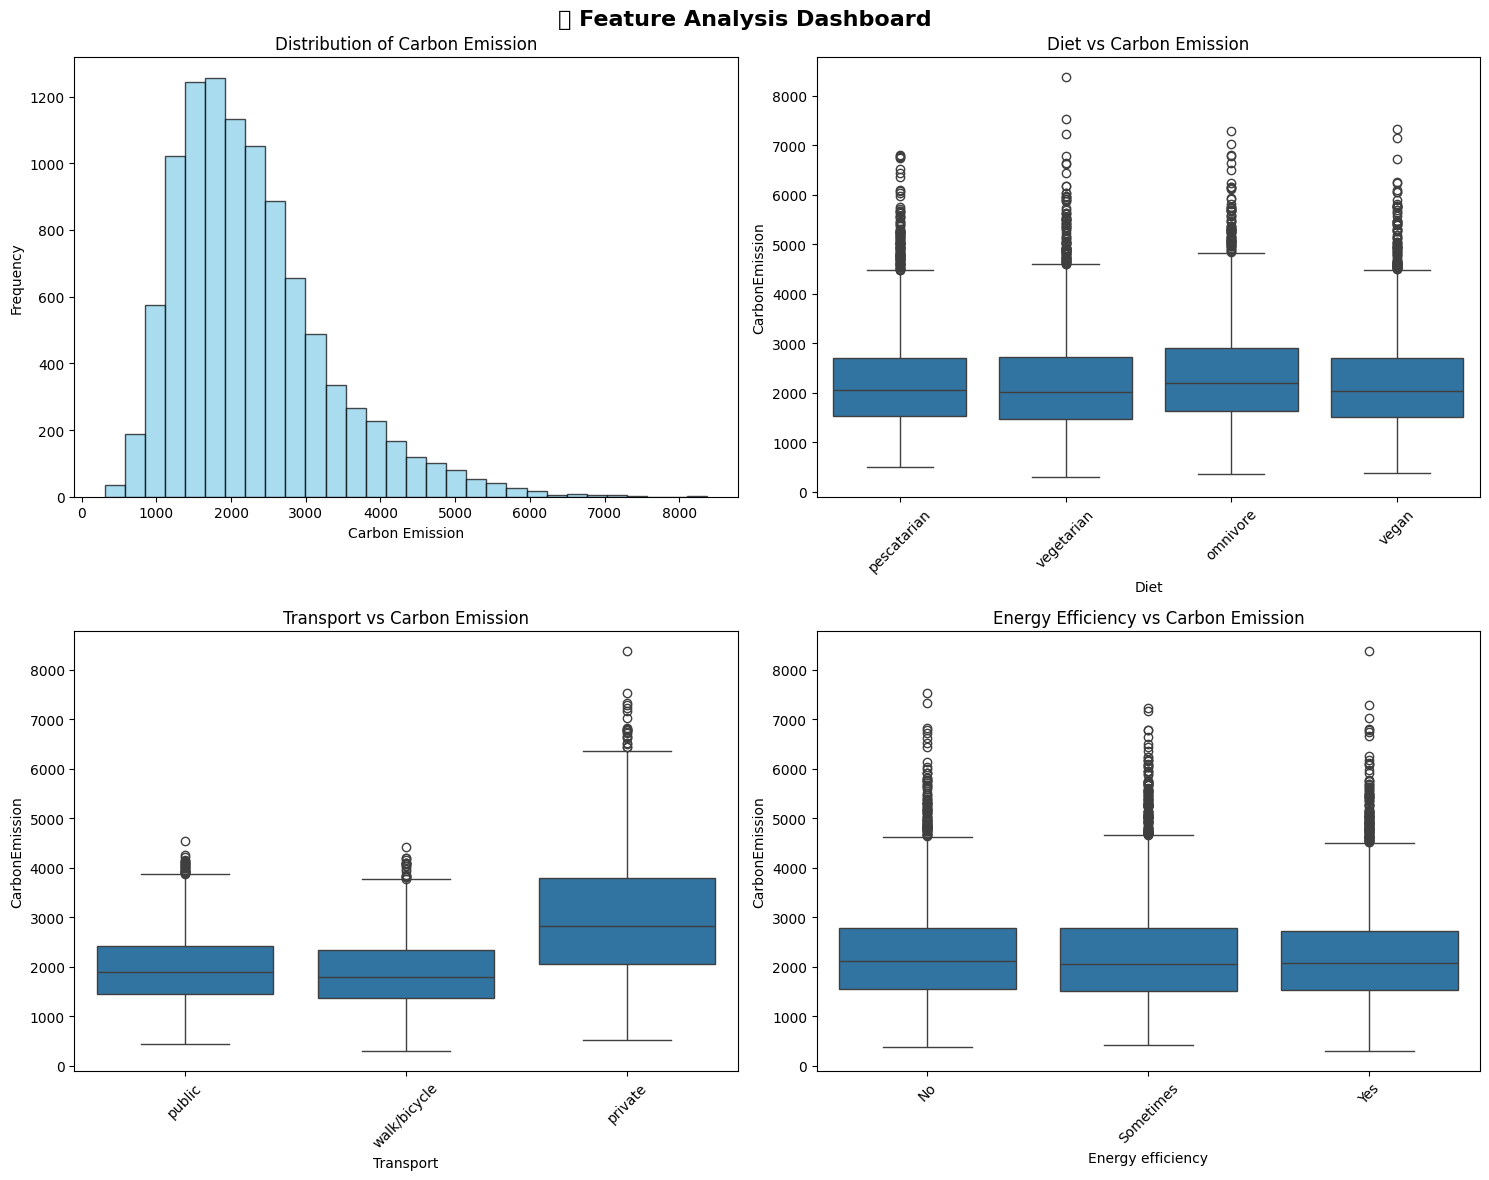

In [65]:
# creating a visual dashboard to visualize our data and proceed further accordingly using seaborn libraray which we have imported earlier
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔍 Feature Analysis Dashboard', fontsize=16, fontweight='bold')

axes[0,0].hist(df_clean['CarbonEmission'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Carbon Emission')
axes[0,0].set_xlabel('Carbon Emission')
axes[0,0].set_ylabel('Frequency')

sns.boxplot(data=df_clean, x='Diet', y='CarbonEmission', ax=axes[0,1])
axes[0,1].set_title('Diet vs Carbon Emission')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_clean, x='Transport', y='CarbonEmission', ax=axes[1,0])
axes[1,0].set_title('Transport vs Carbon Emission')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_clean, x='Energy efficiency', y='CarbonEmission', ax=axes[1,1])
axes[1,1].set_title('Energy Efficiency vs Carbon Emission')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [66]:
#making feature and target columns
print(df_clean.columns.tolist())
feature_columns = [
    'Diet',              
    'Transport',       
    'Energy efficiency'  
]

target_column = 'CarbonEmission' 

print(f"\n✅ Selected Features: {feature_columns}")
print(f"✅ Target Variable: {target_column}")


['Diet', 'Transport', 'Energy efficiency', 'CarbonEmission']

✅ Selected Features: ['Diet', 'Transport', 'Energy efficiency']
✅ Target Variable: CarbonEmission


In [67]:
#Doing data preprocessing as we have object values in selected features column and numerical value in target variable column(converitng selected features columns to numerical)
from sklearn.preprocessing import LabelEncoder
df_processed = df_clean.copy()

for col in df_processed.columns:
    if df_processed[col].dtype == 'object':  
        print(f"🔄 Converting {col} from text to numbers...")
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        print(f"   Categories in {col}: {le.classes_}")
    else:
        print(f"✅ {col} is already numeric")

print(df_processed.dtypes)
print(df_processed.head())


🔄 Converting Diet from text to numbers...
   Categories in Diet: ['omnivore' 'pescatarian' 'vegan' 'vegetarian']
🔄 Converting Transport from text to numbers...
   Categories in Transport: ['private' 'public' 'walk/bicycle']
🔄 Converting Energy efficiency from text to numbers...
   Categories in Energy efficiency: ['No' 'Sometimes' 'Yes']
✅ CarbonEmission is already numeric
Diet                 int32
Transport            int32
Energy efficiency    int32
CarbonEmission       int64
dtype: object
   Diet  Transport  Energy efficiency  CarbonEmission
0     1          1                  0            2238
1     3          2                  0            1892
2     0          0                  1            2595
3     0          2                  1            1074
4     3          0                  2            4743


In [ ]:
#Extracting Features and Target
X = df_processed[feature_columns].copy()
y = df_processed[target_column].copy()

print(X.shape)
print(y.shape)
print(f"\n🔍 Feature data types: {X.dtypes.to_dict()}")
print(f"🔍 Target data type: {y.dtype}")


(10000, 3)

📊 Features shape: (10000, 3)
📊 Target shape: (10000,)

🔍 Feature data types: {'Diet': dtype('int32'), 'Transport': dtype('int32'), 'Energy efficiency': dtype('int32')}
🔍 Target data type: int64


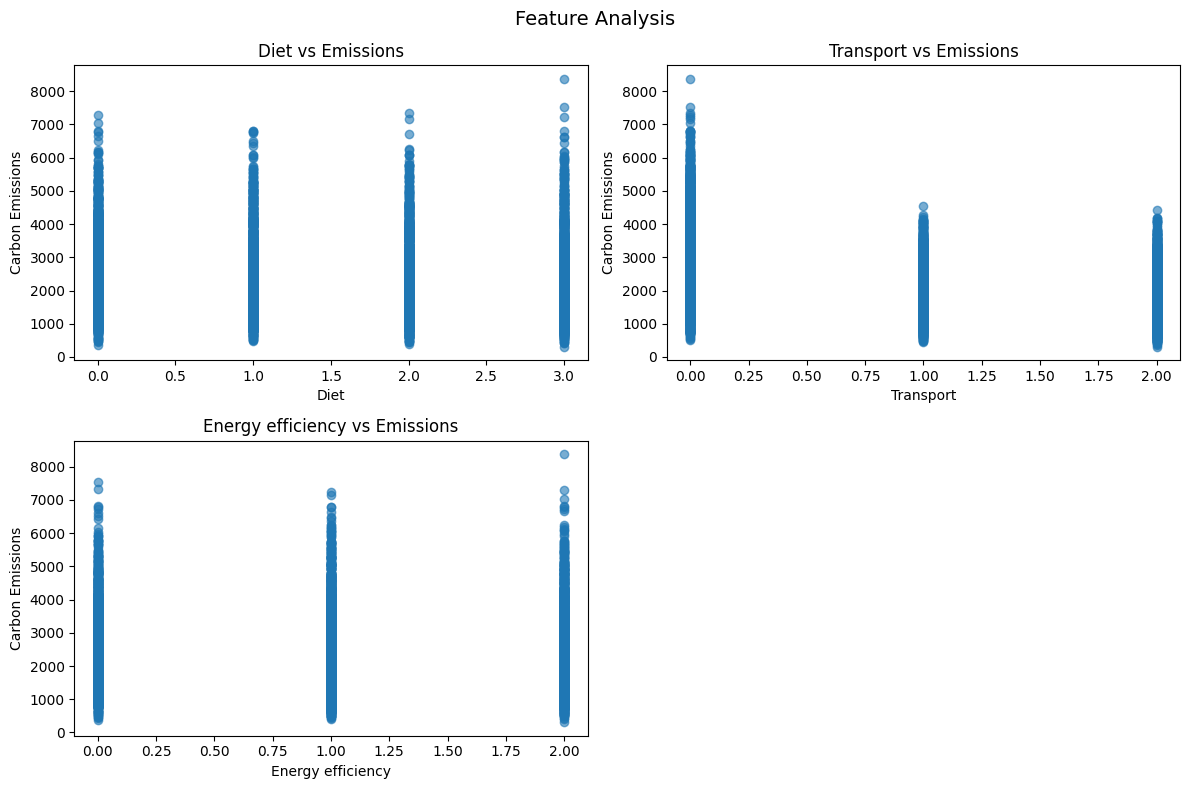

In [69]:
# plotting figres of feature and target plots to visualze it
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Feature Analysis', fontsize=14)

for i, feature in enumerate(feature_columns):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(X[feature], y, alpha=0.6)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Carbon Emissions')
    axes[row, col].set_title(f'{feature} vs Emissions')
                             
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

In [77]:
# doing train test split in the data in the 80-20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

 Training set: 8000 samples
Testing set: 2000 samples


In [74]:
#Training the model using linear regression
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficients: {dict(zip(feature_columns, model.coef_))}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficients: {'Diet': -53.287562799331184, 'Transport': -543.4153624447645, 'Energy efficiency': -27.254212043314187}
Intercept: 2923.0437


In [ ]:
#Doing predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [76]:
# evaluating the model by checking MSE and calculating r2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f" Training MSE: {train_mse:.4f}")
print(f" Testing MSE: {test_mse:.4f}")
print(f" R² Score: {test_r2:.4f}")

 Training MSE: 831456.6152
 Testing MSE: 828194.2154
 R² Score: 0.2034


C:\Users\HP\AppData\Local\Temp\ipykernel_4292\2216857116.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


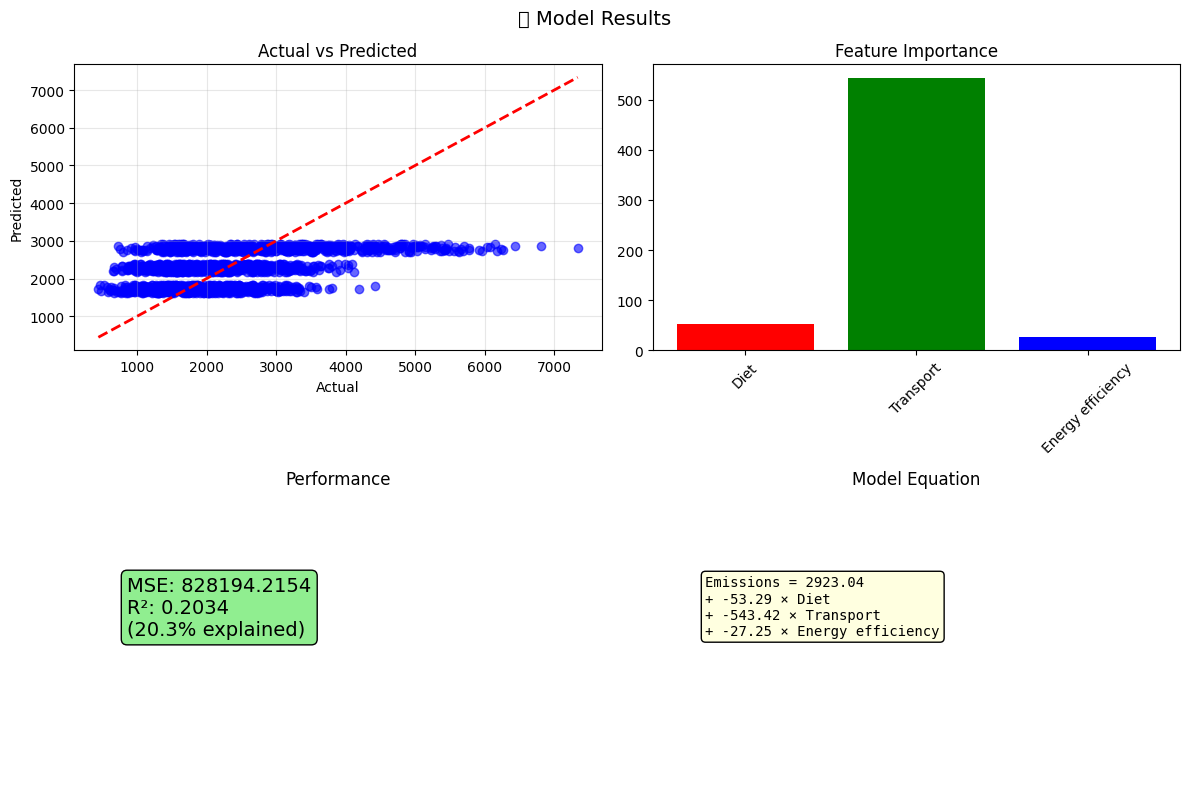

In [78]:
# visualizing the result to make it easy to understand
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('🎯 Model Results', fontsize=14)

axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')
axes[0,0].set_title('Actual vs Predicted')
axes[0,0].grid(True, alpha=0.3)

coef_abs = np.abs(model.coef_)
axes[0,1].bar(feature_columns, coef_abs, color=['red', 'green', 'blue'])
axes[0,1].set_title('Feature Importance')
axes[0,1].tick_params(axis='x', rotation=45)

metrics_text = f"MSE: {test_mse:.4f}\nR²: {test_r2:.4f}\n({test_r2*100:.1f}% explained)"
axes[1,0].text(0.1, 0.5, metrics_text, fontsize=14, 
               bbox=dict(boxstyle="round", facecolor="lightgreen"))
axes[1,0].set_title('Performance')
axes[1,0].axis('off')

equation = f"Emissions = {model.intercept_:.2f}"
for feature, coef in zip(feature_columns, model.coef_):
    equation += f"\n+ {coef:.2f} × {feature}"
axes[1,1].text(0.1, 0.5, equation, fontsize=10, family='monospace',
               bbox=dict(boxstyle="round", facecolor="lightyellow"))
axes[1,1].set_title('Model Equation')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()